In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("../data/Singapore Residents by Planning AreaSubzone Age Group Sex and Floor Area of Residence June 2011-2019.xlsx",sheet_name="Total",skiprows=2)

In [3]:
df=df[(df['Age Group']=='Total')&(df['Floor Area']=='Total*')&(df['Subzone']!='Total')].drop(['Age Group','Floor Area'], axis=1)
df

,Planning Area,Subzone,2011,2012,2013,2014,2015,2016,2017,2018,2019
240,Ang Mo Kio,Ang Mo Kio Town Centre,4960,4850,4880,4970,5020,4980,4940,4820,4820
360,Ang Mo Kio,Cheng San,30140,31020,30910,30400,29770,29050,28350,28320,28190
480,Ang Mo Kio,Chong Boon,29860,29460,29010,28660,27900,27120,26740,27080,26820
600,Ang Mo Kio,Kebun Bahru,25700,25310,25010,24530,23910,23310,22620,22970,22970
720,Ang Mo Kio,Sembawang Hills,6890,6910,6910,6880,6890,6910,6800,6760,6830
...,...,...,...,...,...,...,...,...,...,...,...
44880,Yishun,Springleaf,3820,3890,3900,3910,3880,4010,4070,4230,4350
45000,Yishun,Yishun Central,1590,1570,1560,1550,1490,1460,1420,1350,2020
45120,Yishun,Yishun East,33970,36530,38350,44400,54880,56750,57540,56940,59600
45240,Yishun,Yishun South,40040,39720,39570,39940,38840,38180,38240,40870,42060


In [4]:
population_2020=pd.read_excel("../data/Singapore Residents June 2020.xlsx",sheet_name="Total",skiprows=2)
population_2021=pd.read_excel("../data/population 2021.xlsx",sheet_name="Total",skiprows=2)
population_2022=pd.read_excel("../data/population 2022.xlsx",sheet_name="Total",skiprows=2)
population_2023=pd.read_excel("../data/population 2023.xlsx",sheet_name="Total",skiprows=2)
population_2024=pd.read_excel("../data/population 2024.xlsx",sheet_name="Total",skiprows=2)

In [5]:
population_2021=population_2021[(population_2021['Age Group']=='Total')&(population_2021['Floor Area']=='Total*')&(population_2021['Subzone']!='Total')]
population_2021

,Planning Area,Subzone,Age Group,Floor Area,2021
240,Ang Mo Kio,Ang Mo Kio Town Centre,Total,Total*,4760
360,Ang Mo Kio,Cheng San,Total,Total*,27260
480,Ang Mo Kio,Chong Boon,Total,Total*,25800
600,Ang Mo Kio,Kebun Bahru,Total,Total*,21950
720,Ang Mo Kio,Sembawang Hills,Total,Total*,6640
...,...,...,...,...,...
45960,Yishun,Springleaf,Total,Total*,4350
46080,Yishun,Yishun Central,Total,Total*,2780
46200,Yishun,Yishun East,Total,Total*,60900
46320,Yishun,Yishun South,Total,Total*,41580


In [7]:
population_list = [population_2020, population_2021, population_2022, population_2023, population_2024]

for idx in range(len(population_list)):
    population_list[idx] = population_list[idx][
        (population_list[idx]['Age Group'] == 'Total') &
        (population_list[idx]['Floor Area'] == 'Total*') &
        (population_list[idx]['Subzone'] != 'Total')
    ].drop(['Age Group','Floor Area'], axis=1)
    df = df.merge(population_list[idx],how='left', on=['Planning Area','Subzone'])
    
    
    


In [8]:
df[df['2011']=='-']

,Planning Area,Subzone,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
10,Ang Mo Kio,Yio Chu Kang North,-,-,-,-,-,-,-,-,-,-,-,-,-,-
23,Boon Lay,Liu Fang,-,-,10,10,10,10,10,10,10,10,-,10,10,10
27,Bukit Batok,Brickworks,-,-,-,-,-,-,-,5080,15060,19820,25180,27790,30870,31090
40,Bukit Merah,City Terminals,-,-,20,40,40,40,40,30,20,20,20,20,20,20
69,Changi,Changi Airport,-,-,-,-,-,-,-,-,-,10,-,0,-,-
72,Changi Bay,Changi Bay,-,-,-,-,-,-,-,-,-,-,-,-,-,-
89,Downtown Core,Bayfront Subzone,-,-,-,-,-,-,-,-,-,-,-,-,-,-
94,Downtown Core,Clifford Pier,-,10,10,-,-,-,-,-,-,-,-,0,-,-
96,Downtown Core,Maxwell,-,-,-,-,-,-,-,-,-,-,-,-,-,-
112,Hougang,Lorong Halus,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [9]:
df[df.isnull().any(axis=1)]

,Planning Area,Subzone,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
119,Jurong East,Lakeside,1100,1100,1070,1050,1010,960,910,870,890,NaN,NaN,NaN,NaN,NaN
282,Tengah,Tengah,10,10,10,10,10,10,10,10,10,NaN,NaN,NaN,NaN,NaN
304,Western Water Catchment,Western Water Catchment,1000,1050,1000,960,900,800,710,720,690,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['Planning Area', 'Subzone', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype='object')

In [11]:
numeric_cols = ['2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']  # Get only numeric columns

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

df[numeric_cols] = df[numeric_cols].ffill(axis=1) 
df=df.bfill(axis=1)
df.dropna(inplace=True)
df.isnull().sum()



Planning Area    0
Subzone          0
2011             0
2012             0
2013             0
2014             0
2015             0
2016             0
2017             0
2018             0
2019             0
2020             0
2021             0
2022             0
2023             0
2024             0
dtype: int64

In [12]:
# Convert year columns to numeric
year_cols = [str(year) for year in range(2011, 2025)]
df[year_cols] = df[year_cols].apply(pd.to_numeric, errors='coerce')

df_long = df.melt(id_vars=['Planning Area', 'Subzone'], 
                  value_vars=year_cols, 
                  var_name='Year', 
                  value_name='Population')

# Convert 'Year' to integer
df_long['Year'] = df_long['Year'].astype(int)
df_long


,Planning Area,Subzone,Year,Population
0,Ang Mo Kio,Ang Mo Kio Town Centre,2011,4960.0
1,Ang Mo Kio,Cheng San,2011,30140.0
2,Ang Mo Kio,Chong Boon,2011,29860.0
3,Ang Mo Kio,Kebun Bahru,2011,25700.0
4,Ang Mo Kio,Sembawang Hills,2011,6890.0
...,...,...,...,...
4139,Yishun,Springleaf,2024,4370.0
4140,Yishun,Yishun Central,2024,2880.0
4141,Yishun,Yishun East,2024,71930.0
4142,Yishun,Yishun South,2024,41490.0


In [13]:
df_long[df_long.isnull().any(axis=1)]

,Planning Area,Subzone,Year,Population


In [14]:
from sklearn.linear_model import LinearRegression


# Function to train Linear Regression and predict population
def predict_population(df_long, subzone):
    subzone_data = df_long[df_long['Subzone'] == subzone]
    
    X = subzone_data[['Year']]  # Independent variable (years) - must be DataFrame
    y = subzone_data['Population']  # Dependent variable (population)

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate future years (2025–2035)
    future_years = np.array(range(2025, 2036)).reshape(-1, 1)

    # Convert future_years into a DataFrame to match column names
    future_years_df = pd.DataFrame(future_years, columns=['Year'])
    
    # Predict future population
    future_predictions = model.predict(future_years_df)

    # Create a DataFrame for future predictions
    future_df = pd.DataFrame({'Year': future_years.flatten(), 
                              'Subzone': subzone, 
                              'Predicted Population': future_predictions})
    
    return future_df


# Apply prediction for all subzones
all_predictions = pd.concat([predict_population(df_long, subzone) 
                             for subzone in df_long['Subzone'].unique()])

In [15]:
all_predictions

,Year,Subzone,Predicted Population
0,2025,Ang Mo Kio Town Centre,4850.989011
1,2026,Ang Mo Kio Town Centre,4844.835165
2,2027,Ang Mo Kio Town Centre,4838.681319
3,2028,Ang Mo Kio Town Centre,4832.527473
4,2029,Ang Mo Kio Town Centre,4826.373626
...,...,...,...
6,2031,Yishun West,46302.747253
7,2032,Yishun West,45578.241758
8,2033,Yishun West,44853.736264
9,2034,Yishun West,44129.230769


In [16]:
df_wide = all_predictions.pivot(index=['Subzone'], columns='Year', values='Predicted Population').reset_index()
df_wide

Year,Subzone,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,Admiralty,14228.351648,14316.131868,14403.912088,14491.692308,14579.472527,14667.252747,14755.032967,14842.813187,14930.593407,15018.373626,15106.153846
1,Airport Road,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Alexandra Hill,12308.461538,12000.637363,11692.813187,11384.989011,11077.164835,10769.340659,10461.516484,10153.692308,9845.868132,9538.043956,9230.219780
3,Alexandra North,3226.593407,3425.472527,3624.351648,3823.230769,4022.109890,4220.989011,4419.868132,4618.747253,4817.626374,5016.505495,5215.384615
4,Aljunied,41115.824176,41079.648352,41043.472527,41007.296703,40971.120879,40934.945055,40898.769231,40862.593407,40826.417582,40790.241758,40754.065934
...,...,...,...,...,...,...,...,...,...,...,...,...
291,Yishun South,42272.417582,42510.835165,42749.252747,42987.670330,43226.087912,43464.505495,43702.923077,43941.340659,44179.758242,44418.175824,44656.593407
292,Yishun West,50649.780220,49925.274725,49200.769231,48476.263736,47751.758242,47027.252747,46302.747253,45578.241758,44853.736264,44129.230769,43404.725275
293,Yuhua East,22615.164835,22142.043956,21668.923077,21195.802198,20722.681319,20249.560440,19776.439560,19303.318681,18830.197802,18357.076923,17883.956044
294,Yuhua West,18464.285714,18290.857143,18117.428571,17944.000000,17770.571429,17597.142857,17423.714286,17250.285714,17076.857143,16903.428571,16730.000000


In [17]:
df_wide.columns

Index(['Subzone', 2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034,
       2035],
      dtype='object', name='Year')

In [21]:
df_wide.iloc[:,1:]= df_wide.iloc[:,1:].div(df_wide[2025],axis=0)
df_wide.head(50)

Year,Subzone,2025,2026,2027,2028,2029,2030,2031,2032,2033,2034,2035
0,Admiralty,1.0,1.006169,1.012339,1.018508,1.024678,1.030847,1.037016,1.043186,1.049355,1.055524,1.061694
1,Airport Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alexandra Hill,1.0,0.974991,0.949982,0.924973,0.899963,0.874954,0.849945,0.824936,0.799927,0.774918,0.749908
3,Alexandra North,1.0,1.061637,1.123275,1.184912,1.246550,1.308187,1.369825,1.431462,1.493100,1.554737,1.616375
4,Aljunied,1.0,0.999120,0.998240,0.997360,0.996481,0.995601,0.994721,0.993841,0.992961,0.992081,0.991201
5,Anak Bukit,1.0,1.000490,1.000980,1.001470,1.001960,1.002450,1.002940,1.003430,1.003921,1.004411,1.004901
6,Anchorvale,1.0,1.034024,1.068048,1.102073,1.136097,1.170121,1.204145,1.238169,1.272194,1.306218,1.340242
7,Ang Mo Kio Town Centre,1.0,0.998731,0.997463,0.996194,0.994926,0.993657,0.992389,0.991120,0.989851,0.988583,0.987314
8,Anson,1.0,1.027692,1.055385,1.083077,1.110769,1.138462,1.166154,1.193846,1.221538,1.249231,1.276923
9,Balestier,1.0,1.000563,1.001127,1.001690,1.002253,1.002816,1.003380,1.003943,1.004506,1.005069,1.005633


In [19]:
#df_wide.to_csv('../data/Population_growth.csv')

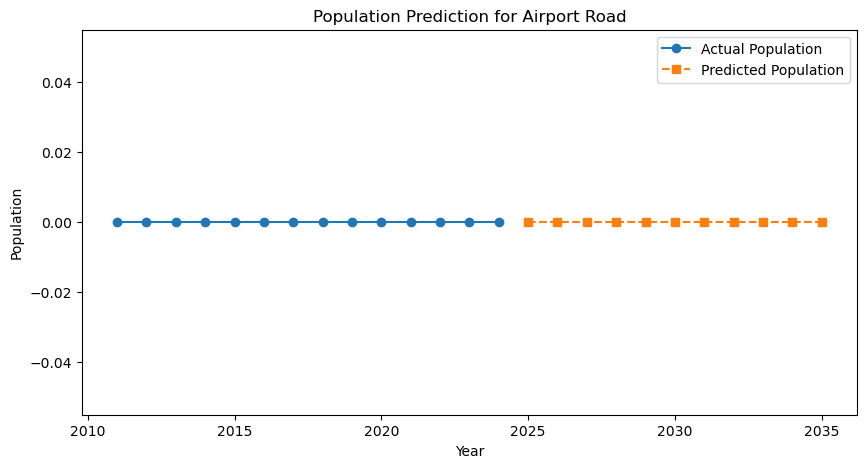

In [ ]:
# Function to visualize actual vs predicted population
def plot_population(subzone):
    past_data = df_long[df_long['Subzone'] == subzone]
    future_data = all_predictions[all_predictions['Subzone'] == subzone]
    
    plt.figure(figsize=(10, 5))
    plt.plot(past_data['Year'], past_data['Population'], marker='o', label="Actual Population")
    plt.plot(future_data['Year'], future_data['Predicted Population'], marker='s', linestyle="--", label="Predicted Population")
    
    plt.xlabel("Year")
    plt.ylabel("Population")
    plt.title(f"Population Prediction for {subzone}")
    plt.legend()
    plt.show()

# Example: Plot for "Yishun West"
plot_population("YiShun West")

# Save predictions to a CSV file
#all_predictions.to_csv("population_predictions_2025_2034.csv", index=False)